# Tutorial Python

Traducido y adaptado por [Pablo Andrés Uriza](https://pa-uriza.github.io/) y Daniel Restrepo de la adaptación hecha por [Volodymyr Kuleshov](http://web.stanford.edu/~kuleshov/) y [Isaac Caswell](https://symsys.stanford.edu/viewing/symsysaffiliate/21335) para el curso `CS228`, del tutorial de Python para el curso `CS231n` hecho por Justin Johnson (http://cs231n.github.io/python-numpy-tutorial/).

## Introducción

Python es un gran lenguaje de programación de propósito general por sí solo, pero con la ayuda de algunas bibliotecas populares (numpy, scipy, matplotlib) se convierte en un poderoso entorno para la computación científica.

Esta sección servirá como un curso acelerado sobre el lenguaje de programación Python y sobre el uso de Python para la computación científica.

En este tutorial, cubriremos:

* Python básico: tipos de datos básicos (contenedores, listas, diccionarios, conjuntos, tuplas), funciones, clases
* Numpy: matrices, indexación de matrices, tipos de datos, matemáticas de matrices, *broadcasting*
* Matplotlib: plots, subplots

## Python básico

Python es un lenguaje de programación multiparadigma de escritura dinámica de alto nivel. A menudo se dice que el código Python es casi como un pseudocódigo, ya que le permite expresar ideas muy poderosas en muy pocas líneas de código mientras es muy legible. Como ejemplo, aquí hay una implementación del algoritmo clásico de ordenación rápida en Python:

In [ ]:
def quicksort(arr):
    if len(arr) <= 1:
        return arr
    pivot = arr[len(arr) // 2]
    left = [x for x in arr if x < pivot]
    middle = [x for x in arr if x == pivot]
    right = [x for x in arr if x > pivot]
    return quicksort(left) + middle + quicksort(right)

print(quicksort([3,6,8,10,1,2,1]))

[1, 1, 2, 3, 6, 8, 10]


### Versiones de Python

Por mucho tiempo hubo dos versiones compatibles diferentes de Python, 2.7 y 3.X. Un tanto confuso, Python 3.0 introdujo muchos cambios incompatibles con versiones anteriores en el lenguaje, por lo que el código escrito para 2.7 puede no funcionar en 3.X y viceversa. Para esta clase, todo el código usará Python 3.7.

Puede verificar su versión de Python en la línea de comando ejecutando `python --version` .:

### Tipos de datos básicos

#### Números

Los enteros y reales funcionan como esperaríamos de otros lenguajes:

In [ ]:
x = 3
print(x, type(x))

In [ ]:
print(x + 1)   # Suma;
print(x - 1)   # Resta;
print(x * 2)   # Multiplicación;
print(x ** 2)  # Potenciación;

In [ ]:
x += 1
print(x)  # Imprime "4"
x *= 2
print(x)  # Imprime "8"

In [ ]:
y = 2.5
print(type(y)) # Imprime "<type 'float'>"
print(y, y + 1, y * 2, y ** 2) # Imprime "2.5 3.5 5.0 6.25"

Tenga en cuenta que, a diferencia de muchos lenguajes, Python no tiene operadores unarios de incremento (x ++) o decremento (x--).

Python también tiene tipos integrados para enteros largos (*long integers*) y números complejos; puede encontrar todos los detalles en la [documentación](https://docs.python.org/3/library/stdtypes.html#numeric-types-int-float-long-complex).

#### Booleanos

Python implementa todos los operadores habituales para la lógica booleana, pero usa palabras en inglés en lugar de símbolos (&&, ||, etc.)

In [ ]:
t, f = True, False
print(type(t)) # Imprime "<type 'bool'>"

Ahora veamos las operaciones:

In [ ]:
print(t and f) # Logical AND;
print(t or f)  # Logical OR;
print(not t)   # Logical NOT;
print(t != f)  # Logical XOR;

#### Strings

In [ ]:
hello = 'hello'   # Los strings pueden declararse usando comillas sencillas
world = "world"   # o comillas dobles, no importa.
print (hello, len(hello))

In [ ]:
hw = hello + ' ' + world  # Concatenación de Strings
print (hw)  # Imprime "hello world"

In [ ]:
hw12 = f'{hello} {world} {2021}'  # Formateo de strings
print (hw12)  # Imprime "hello world 2021"

Los objetos tipo String tienene varios métodos útiles; por ejemplo:

In [ ]:
s = "hello"
print (s.capitalize())  # Pone la primera letra en mayúscula a un string; Imprime "Hello"
print (s.upper())       # Convierte la string a mayúscula sostenida; Imprime "HELLO"
print (s.rjust(7))      # Justifica a la derecha una string añadiendo espacios a la izquierda; Imprime "  hello"
print (s.center(7))     # Centra una string añadiendo espacios a ambos lados; Imprime " hello "
print (s.replace('l', '(ell)'))  # Reemplaza todas las instancias de una substring con otra;
                               # imprime "he(ell)(ell)o"
print ('  world '.strip())  # Remueve los espacios en blanco al inicio y al final; Imprime "world"

Puede encontrar una lista de todos los métodos de cadena en la [documentación](https://docs.python.org/3/library/stdtypes.html#string-methods).

### Contenedores

Python incluye varios tipos de contenedores integrados: listas, diccionarios, conjuntos y tuplas.

#### Lists

Una lista es el equivalente en Python de un arreglo, pero se puede cambiar de tamaño y puede contener elementos de diferentes tipos:

In [ ]:
xs = [3, 1, 2]   # Crea una lista
print(xs, xs[2])
print(xs[-2])    # Lo indices negativos cuentan desde el final de la lista; Imprime "2


In [ ]:
xs[2] = 'foo'    # Las listas pueden contener elementos de diferentes tipos
print(xs)

In [ ]:
xs.append('bar') # Agrega un nuevo elemento al final de la lista
print(xs)  

In [ ]:
x = xs.pop()     # Remueve y retorna el último elemento de la lista
print(x, xs) 

Como de costumbe, todos los detalles de las listas se encuentran en la [documentación](https://docs.python.org/3/tutorial/datastructures.html#more-on-lists).

#### Slicing

Además de acceder a los elementos de la lista de uno en uno, Python proporciona una sintaxis concisa para acceder a las sublistas; esto se conoce como *slicing* (rebanar):

In [ ]:
nums = list(range(5))    # creamos una lita de enteros a partir de la función range
print(nums)              # Imprime "[0, 1, 2, 3, 4]"
print(nums[2:4])         # Obtiene una slice desde el índice 2 al 4 (exclusive); imprime "[2, 3]"
print(nums[2:])          # Obtiene una slice desde el índice 2 al final; imprime "[2, 3, 4]"
print(nums[:2])          # Obtiene una slice desde el inicio al índice 2 (exclusive); imprime "[0, 1]"
print(nums[:])           # Obtiene una slice de toda la lista; imprime ["0, 1, 2, 3, 4]"
print(nums[:-1])         # Los índices de una slice pueden ser negativos; imprime ["0, 1, 2, 3]"

[0, 1, 2, 3, 4]
[2, 3]
[2, 3, 4]
[0, 1]
[0, 1, 2, 3, 4]
[0, 1, 2, 3]


#### Bucles

Es posible hacer bucles sobre elementos de una lista así:

In [ ]:
animales = ['cat', 'dog', 'monkey']
for a in animales:
    print(a)

cat
dog
monkey


Si desea acceder al índice de cada elemento dentro del cuerpo de un bucle, use la función incorporada `enumerate`:

In [ ]:
animals = ['cat', 'dog', 'monkey']
for idx, animal in enumerate(animals):
    print (f'#{idx + 1}: {animal}')

#1: cat
#2: dog
#3: monkey


#### List comprehensions:

A la hora de programar, con frecuencia queremos transformar un tipo de datos en otro. Como ejemplo simple, considere el siguiente código que calcula números cuadrados:

In [ ]:
nums = [0, 1, 2, 3, 4]
squares = []
for x in nums:
    squares.append(x ** 2)
    #print(squares)
print(squares)

[0, 1, 4, 9, 16]


Podemos simplificar este código usando una *list comprehension*:

In [ ]:
nums = [0, 1, 2, 3, 4]
squares = [x ** 2 for x in nums]
print(squares)

[0, 1, 4, 9, 16]


Las *list comprehensions* también pueden contener algunas condiciones:

In [ ]:
nums = [0, 1, 2, 3, 4]
even_squares = [x ** 2 for x in nums if x % 2 == 0]
print(even_squares)

#### Diccionarios

Un diccionario almacena pares (key, value). Puedes usarlo así:

In [ ]:
d = {'cat': 'cute', 'dog': 'furry'}  # Crea un nuevo diccionario con alguna data
print(d['cat'])       # Obtiene la una entrada del diccionario; imprime "cute"
print('cat' in d)     # Revisa si un diccionario tiene una *key* dada; imprime "True"

cute
True


In [ ]:
d['fish'] = 'wet'    # define una entrada para el diccionario
print (d['fish'])    # Imprime "wet"
print(d)

wet
{'cat': 'cute', 'dog': 'furry', 'fish': 'wet'}


In [ ]:
print (d['monkey'])  # KeyError: 'monkey' not a key of d -> La llave 'momnkey' no existe en el diccionario d

KeyError: 'monkey'

In [ ]:
print (d.get('monkey', 'N/A'))  # Obtiene un elemento considerando un valor por defecto; imprime "N/A"
print (d.get('fish', 'N/A'))    # Obtiene un elemento considerando un valor por defecto; imprime "wet"

In [ ]:
del d['fish']        # Remueve un elemento de un diccionario
print (d.get('fish', 'N/A')) # "fish" ya no es una llave; imprime "N/A"

Todo lo que se necesita saber sobre los diccionarios está en la [documentación](https://docs.python.org/3/library/stdtypes.html#dict).

Es fácil iterar sobre las *keys* de un diccionario:

In [ ]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal in d:
    legs = d[animal]
    print(f'A {animal} has {legs} legs')

A person has 2 legs
A cat has 4 legs
A spider has 8 legs


Si quieres acceder a las *keys* y su respectivos *values*, usa el método iteritems:

In [ ]:
d = {'person': 2, 'cat': 4, 'spider': 8}
for animal, legs in d.items():
    print (f'A {animal} has {legs} legs')

Dictionary comprehensions: Estos son similares a las *list comprehensions*, pero permiten construir diccionarios fácilmente. Por ejemplo:

In [ ]:
nums = [0, 1, 2, 3, 4]
even_num_to_square = {x: x ** 2 for x in nums if x % 2 == 0}
print(even_num_to_square)

#### Conjuntos

Un conjunto es una colección sin orden de elementos distintos. Como ejemplo simple, considera lo siguiente:

In [ ]:
animals = {'cat', 'dog'}
print('cat' in animals)   # Revisa si un elemento está en un conjunto; imprime "True"
print('fish' in animals)  # imprime "False"


In [ ]:
animals.add('fish')      # Agrega un elemento al conjunto
print('fish' in animals)
print(len(animals))     # Número de elementos en un conjunto;

In [ ]:
animals.add('cat')       # Agregar un elemento que ya está en el conjunto no hace nada
print(animals)
print(len(animals))       
animals.remove('cat')    # Remueve un elemento de un conjunto
print(animals)
print(len(animals))       

_Bucles_: La iteración sobre un conjunto tiene la misma sintaxis que la iteración sobre una lista; sin embargo, dado que los conjuntos no están ordenados, no puede hacer suposiciones sobre el orden en el que visita los elementos del conjunto:

In [ ]:
animals = {'cat', 'dog', 'fish'}
for idx, animal in enumerate(animals):
    print('{}: {}'.format(idx + 1, animal))
# Imprime "#1: fish", "#2: dog", "#3: cat"

Set comprehensions: Como con las listas y los diccionarios, podemos construir conjuntos fácilmente usando *set comprehension*s:

In [ ]:
from math import sqrt
print({int(sqrt(x)) for x in range(30)})

#### Tuplas

Una tupla es una lista ordenada (inmutable) de valores. Una tupla es en muchos aspectos similar a una lista; una de las diferencias más importantes es que las tuplas se pueden utilizar como claves en diccionarios y como elementos de conjuntos, mientras que las listas no. Aquí hay un ejemplo trivial:

In [ ]:
d = {(x, x + 1): x for x in range(10)}  # Crea un diccionario con tuplas como keys
t = (5, 6)       # Crea una tuple
print(type(t))
print(d[t])       
print(d[(1, 2)])

<class 'tuple'>
5
1


In [ ]:
t[0] = 1  #La tupla es inmutable. No permite asignación.

### Funciones

Las funciones de Python se definen usando la palabra clave `def`. Por ejemplo:

In [ ]:
def sign(x):
  if x > 0:
      return 'positive'
  elif x < 0:
      return 'negative'
  else:
      return 'zero'

for x in [-1, 0, 1]:
    print(sign(x))

print(sign(0))

zero


A menudo definiremos funciones para tomar argumentos de palabras clave opcionales, como loud en este ejemplo:

In [ ]:
def hello(name, loud=False):
    if loud:
        print(f'HELLO, {name.upper()}')
    else:
        print(f'Hello, {name}!')

hello('Bob')
hello('Fred', loud=True)

### Clases

La sintaxis para definir clases en Python es sencilla:

In [ ]:
class Greeter:    # Saludador

    # Constructor
    def __init__(self, name):
        self.name = name  # Crea un atributo (variable) de la instancia

    # Método de la instancia
    def greet(self, loud=False):
        if loud:
            print(f'HELLO, {self.name.upper()}!') #Para acceder a un atributo dentro de la misma clase, se usa la palabra self y luego el nombre del atributo
        else:
            print(f'Hello, {self.name}'.format())

g = Greeter('Fred')  # Cosntruye una instancia de la clase Greeter
g.greet()            # Llama el método de la instancia g; imprime "Hello, Fred"
g.greet(loud=True)   # Llama el método de la instancia g; imprime "HELLO, FRED!"

Hello, Fred
HELLO, FRED!


Las clases proporcionan un medio para agrupar datos y funciones. La creación de una nueva clase crea un nuevo tipo de objeto, lo que permite crear nuevas instancias de ese tipo.

In [ ]:
class MyClass:
    """Un ejemplo simple de una clase"""
    i = 12345
    k = 8


In [ ]:
x = MyClass()
y = MyClass()

Cada instancia de clase puede tener atributos adjuntos para mantener su estado. Las instancias de clase también pueden tener métodos (definidos por su clase) para modificar su estado.

In [ ]:
print(MyClass.i)
print(y.i)
print(x.i+y.k)

12345
12345
12353


Las instancias de clase también pueden tener métodos (definidos por su clase) para modificar su estado.

In [ ]:
class MyClass:
    """Un ejemplo simple de una clase"""
    i = 12345

    def f(self):
        return 'hello world'

Por ejemplo:

In [ ]:
>>> class Complex:
...     def __init__(self, realpart, imagpart):
...         self.r = realpart
...         self.i = imagpart


x = Complex(3.0, -4.5)
y = Complex(7.5, 8)

print(y.r) # Imprime la parte real
print(y.i) # Imprime la parte imaginaria

7.5
8


## Numpy

Numpy es la biblioteca central para la computación científica en Python. Proporciona arreglos multidimensionales de alto rendimiento y herramientas para trabajar con estos arreglos.

Para usar Numpy, primero necesitamos importar el paquete `numpy`. Lo podemos importar con el alias `np`:

In [ ]:
import numpy as np

### Arreglos

Un arreglo numérica es una cuadrícula de valores, todos del mismo tipo, y está indexado por una tupla de enteros no negativos. El número de dimensiones es el rango del arreglo; la forma (*shape*) de una matriz es una tupla de números enteros que dan el tamaño de la matriz a lo largo de cada dimensión.

Podemos inicializar matrices numpy de listas de Python anidadas y acceder a elementos usando corchetes:

In [ ]:
a = np.array([1, 2, 3])  # Crea un arreglo de rango 1
print(f' a es de tipo: {type(a)}, es de forma {a.shape}, a[0] = {a[0]}, a[1] = {a[1]}, a[2] = {a[2]}')
a[0] = 5                 # Cambia un elemento del arreglo
print(a)                  

 a es de tipo: <class 'numpy.ndarray'>, es de forma (3,), a[0] = 1, a[1] = 2, a[2] = 3
[5 2 3]


In [ ]:
b = np.array([[1,2,3],[4,5,6]])   # Crea un arreglo de rango 2
print(b)

[[1 2 3]
 [4 5 6]]


In [ ]:
print(b.shape)                   
print(b[0, 0], b[0, 1], b[1, 0])

(2, 3)
1 2 4


Numpy también proporciona muchas funciones para crear matrices:

In [ ]:
a = np.zeros((2,2))  # Crea un arreglo con ceros en todas las posiciones
print(a, type(a))

[[0. 0.]
 [0. 0.]] <class 'numpy.ndarray'>


In [ ]:
b = np.ones((1,2))   # Crea un arreglo con unos en todas las posiciones
print(b)
print(b.shape)

[[1. 1.]]
(1, 2)


In [ ]:
c = np.full((2,2), 7) # Crea un arreglo constante
print(c) 

[[7 7]
 [7 7]]


In [ ]:
d = np.eye(2)        # Crea una matriz identidad 2x2
print(d)

[[1. 0.]
 [0. 1.]]


In [ ]:
e = np.random.random((2,2)) # Crea un arreglo con valores aleatorios entre 0 y 1
print(e)

[[0.61450039 0.41578148]
 [0.59580962 0.85369741]]


### Array indexing

Numpy ofrece varias formas de indexar en arreglos.

Slicing: similar a las listas de Python, los arreglos numpy se les pueden hacer slices. Dado que los arreglos pueden ser multidimensionales, se debe especificar un slice para cada dimensión del arreglo:

In [ ]:
import numpy as np

# Crea el siguiente arreglo de rango 2 con forma (3, 4)
# [[ 1  2  3  4]
#  [ 5  6  7  8]
#  [ 9 10 11 12]]
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

# Usamos slicing para recuperar un subarreglo que consiste de las 2 primeras
# filas y las columnas 1 y 2; b es el siguiente arreglo de forma (2, 2):
# [[2 3]
#  [6 7]]
b = a[:2, 1:3]
print(b)


Un slice de un arreglo es una vista de los mismos datos, por lo que modificarla modificará la matriz original.

In [ ]:
print(a[0, 1]) 
b[0, 0] = 77    # b[0, 0] es la misma pieza de datos que a[0, 1]
print(a[0, 1]) 

También puede mezclar la indexación con enteros con la indexación con slices. Sin embargo, hacerlo producirá una matriz de rango más bajo que la matriz original.

In [ ]:
# Crea el siguiente arreglo de rango 2 con forma (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)

Dos formas de acceder a los datos de la fila central de la matriz.
Mezclar la indexación de enteros con *slices* produce una matriz de rango inferior, mientras que usar solo *slices* produce una matriz del mismo rango que la matriz original:

In [ ]:
row_r1 = a[1, :]    # Vista de rango 1 de la segunda fila de a
row_r2 = a[1:2, :]  # Vista de rango 2 de la segunda fila de a
row_r3 = a[[1], :]  # Vista de rango 2 de la segunda fila de a
print(row_r1, row_r1.shape) 
print(row_r2, row_r2.shape)
print(row_r3, row_r3.shape)

[0. 0.] (2,)
[[0. 0.]] (1, 2)
[[0. 0.]] (1, 2)


In [ ]:
# Podemos hacer la misma distinción al acceder a las columnas de un arreglo:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print (col_r1, col_r1.shape)
print ()
print (col_r2, col_r2.shape)

Indexación entera de arreglos: cuando se indexa arreglos de números utilizando *slicing*, la vista de arreglo resultante siempre será una submatriz de la matriz original. Por el contrario, la indexación de matrices enteras le permite construir matrices arbitrarias utilizando los datos de otra matriz. Aquí hay un ejemplo:

In [ ]:
a = np.array([[1,2], [3, 4], [5, 6]])

print(a,'\n')
# Un ejemplo de indexación entera de arreglos.
# El arreglo resultante tendrá forma (3,) y es el siguiente: 
print (a[[0, 1, 2], [0, 1, 0]])

print('\n')

# El ejemplo anterior de indexación entera de arreglo es equivalente a esto:
print (np.array([a[0, 0], a[1, 1], a[2, 0]]))

[[1 2]
 [3 4]
 [5 6]] 

[1 4 5]


[1 4 5]


In [ ]:
# Al usar indexación entera de arreglos, se puede reutilizar el mismo elemento
# del arreglo original:
print (a[[0, 0], [1, 1]])

# Equivalente al ejemplo previo de indexación entera de arreglos
print (np.array([a[0, 1], a[0, 1]]))

Un truco útil con la indexación de matrices de enteros es seleccionar o mutar un elemento de cada fila de una matriz:

In [ ]:
# Creamos un arreglo nuevo del que seleccionaremos elementos
a = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
print (a)

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]


In [ ]:
# Creamos un arreglo de índices
b = np.array([0, 2, 0, 1])

# Seleccionamos un elemento de cada fila usando los índices en b
print(a[np.arange(4), b])  # Imprime "[ 1  6  7 11]"


[ 1  6  7 11]


In [ ]:
# Mutamos un elemento de cada fila usando los índices en b
a[np.arange(4), b] += 10
print(a)

Indexación booleana de arreglos: la indexación booleana de arreglos permite seleccionar elementos arbitrarios de una matriz. Con frecuencia, este tipo de indexación se utiliza para seleccionar los elementos de una matriz que satisfacen alguna condición. Aquí hay un ejemplo:

In [ ]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)  # Encuentra los elementos que son mayores que 2;
                    # esto devuelve un arreglo numpy de booleanos de la misma
                    # forma de a, donde cada componente de bool_idx informa
                    # si el elemento de a es > 2.

print(bool_idx)

In [ ]:
# Usamos indexación booleana de arreglos para construir un arreglo de rango 1
# que consiste de los elementos que corresponden alos valores con True del
# arreglo bool_idx
print(a[bool_idx])

# Podemos hacer todo lo arrba con esta instrucción concisa:
print(a[a > 2])


Por brevedad, hemos omitido muchos detalles sobre la indexación de arreglos numpy; si quieres saber más debes leer la documentación.

### Tipos de datos

Cada arreglo numpy es una cuadrícula de elementos del mismo tipo. Numpy proporciona un gran conjunto de tipos de datos numéricos que puede utilizar para construir matrices. Numpy intenta adivinar un tipo de datos cuando crea una matriz, pero las funciones que construyen matrices generalmente también incluyen un argumento opcional para especificar explícitamente el tipo de datos. Aquí hay un ejemplo:

In [ ]:
x = np.array([1, 2])  # Permite a numpy elegir el tipo de datos
y = np.array([1.0, 2.0])  # Permite a numpy elegir el tipo de datos
z = np.array([1, 2], dtype=np.int64)  # Fuerza a un tipo particular de datos

print (x.dtype, y.dtype, z.dtype)

Puedes leer todo sobre tipos de datos numpy en la [documentación](http://docs.scipy.org/doc/numpy/reference/arrays.dtypes.html).

### Matemática de arreglos

Las funciones matemáticas básicas operan componente a componente y están disponibles usando operadores y como funciones en el módulo numpy:

In [ ]:
x = np.array([[1,2],[3,4]], dtype=np.float64)
y = np.array([[5,6],[7,8]], dtype=np.float64)

# Suma componente a componente. Ambas producen el mismo arreglo.
print(x + y)
print(np.add(x, y))

In [ ]:
# Resta componente a componente. Ambas producen el mismo arreglo.
print(x - y)
print(np.subtract(x, y))

In [ ]:
# Multiplicación componente a componente. Ambas producen el mismo arreglo.
print(x * y)
print(np.multiply(x, y))

In [ ]:
# División componente a componente. Ambas producen el mismo arreglo.
# [[ 0.2         0.33333333]
#  [ 0.42857143  0.5       ]]
print(x / y)
print(np.divide(x, y))

In [ ]:
# Raíz cuadrada componente a componente. Ambas producen el mismo arreglo.
# [[ 1.          1.41421356]
#  [ 1.73205081  2.        ]]
print(np.sqrt(x))

A diferencia de de otros lenguajes, `*` es una multiplicación componente a componente, no una multiplicación de matrices. En su lugar, usamos la función `dot` para calcular los productos internos de los vectores, para multiplicar un vector por una matriz y para multiplicar matrices. `dot` está disponible como función en el módulo numpy y como método de instancia de objetos de matriz:

In [ ]:
x = np.array([[1,2],[3,4]])
y = np.array([[5,6],[7,8]])

v = np.array([9,10])
w = np.array([11, 12])

# Producto interno de vectores. Ambos producen 219
print(v.dot(w))
print(np.dot(v, w))
print(v @ w)

In [ ]:
# Producto matriz / vector product; ambos producen el arreglo de rango 1 [29 67]
print(x.dot(v))
print(np.dot(x, v))

In [ ]:
# Producto matriz / matriz product; ambos producen el arreglo de rango 2
# [[19 22]
#  [43 50]]
print(x.dot(y))
print(np.dot(x, y))
print(x @ y)

Para realizar otras operaciones de matrices típicas del álgebra lineal como el calculo de la inversa, podemos utilizar el submódulo `linalg` de `numpy`:

In [ ]:
from numpy.linalg import inv

x = np.array([[1,2],[3,4]])
print(inv(x))

Numpy proporciona muchas funciones útiles para realizar cálculos en matrices:

In [ ]:
x = np.array([[-1,2],[-3,4]])

print(np.sum(x))  # Computa la suma de todos los elementos; imprime "10"
print(np.sum(x, axis=0))  # Computa la suma de cada columna; imprime "[4 6]"
print(np.sum(x, axis=1))  # Computa la suma de cada fila; imprime "[3 7]"
print(np.abs(x))

In [ ]:
x = np.array([[1,2],[3,4]])
print(np.sin(x))
print(np.exp(x))
print(np.power(3, x))
print(np.log(x))
print(np.log10(x))

Para cálculos grandes, a veces es útil poder especificar la matriz donde se almacenará el resultado del cálculo. En lugar de crear una matriz temporal, esto se puede usar para escribir los resultados del cálculo directamente en la ubicación de la memoria donde le gustaría que estuvieran. Para todos los ufuncs, esto se puede hacer usando el argumento out de la función:

In [ ]:
x = np.arange(5)
y = np.empty(5)
np.multiply(x, 10, out=y)
print(y)

In [ ]:
y = np.zeros(10)
np.power(2, x, out=y[::2])
print(y)


Además de calcular funciones matemáticas utilizando arreglos, con frecuencia necesitamos cambiar la forma o manipular datos en arreglos. El ejemplo más simple de este tipo de operación es la transposición de una matriz; para transponer una matriz, simplemente use el atributo T de un objeto de matriz:

In [ ]:
print(x)
print(x.T)

In [ ]:
v = np.array([[1,2,3]])
print(v)
print(v.T)

Hay algunos agregados interesantes que se pueden calcular directamente desde el objeto. Por ejemplo, si queremos reducir una matriz con una operación en particular, podemos usar el método reduce de cualquier ufunc. Reducir aplica repetidamente una operación determinada a los elementos de una matriz hasta que solo queda un resultado

In [ ]:
x = np.arange(1, 6)
np.add.reduce(x)

In [ ]:
np.multiply.reduce(x)

120

Si quisiéramos almacenar todos los resultados intermedios del cálculo, podemos usar acumular en su lugar:

In [ ]:
np.add.accumulate(x)

array([ 1,  3,  6, 10, 15])

In [ ]:
np.multiply.accumulate(x)

A menudo, cuando se enfrenta a una gran cantidad de datos, un primer paso es calcular estadísticas resumidas para los datos en cuestión. Quizás las estadísticas de resumen más comunes son la media y la desviación estándar, que le permiten resumir los valores "típicos" en un conjunto de datos, pero otros agregados también son útiles (la suma, el producto, la mediana, el mínimo y el máximo, los cuantiles, etc. ).

Para min, max, sum y varios otros agregados NumPy, una sintaxis más corta es usar métodos del objeto de matriz en sí

In [ ]:
big_array = np.random.rand(1000000)
print(np.min(big_array), np.max(big_array))
print(big_array.min(), big_array.max())


NameError: name 'np' is not defined

In [ ]:
print("Promedio:       ", big_array.mean())
print("Desviación Estándar:", big_array.std())
print("Percentil 75: ", np.percentile(big_array, 75))
print("Mediana: ", np.median(big_array))

NameError: name 'big_array' is not defined

Puedes encontrar la lista completa de funciones matemáticas proporcionadas por numpy en la [documentación](http://docs.scipy.org/doc/numpy/reference/routines.math.html).

### Broadcasting

Broadcasting es un mecanismo poderoso que permite a numpy trabajar con matrices de diferentes formas al realizar operaciones aritméticas. Con frecuencia tenemos una matriz más pequeña y una matriz más grande, y queremos usar la matriz más pequeña varias veces para realizar alguna operación en la matriz más grande.

Por ejemplo, suponga que queremos agregar un vector constante a cada fila de una matriz. Podríamos hacerlo así:

In [ ]:
# Sumaremos el vectov a cada fila de la matriz x,
# guardando el resultado en la matriz y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = np.empty_like(x)   # Creamos una matriz vacía con la misma forma de x

# Suma el vector v a cada fila de la matriz x usando un bucle explícito
for i in range(4):
    y[i, :] = x[i, :] + v

print (y)

Esto funciona; sin embargo, cuando la matriz `x` es muy grande, calcular un buble explícito en Python podría ser lento. Tenga en cuenta que agregar el vector `v` a cada fila de la matriz `x` es equivalente a formar una matriz `vv` apilando múltiples copias de `v` verticalmente y luego realizar la suma de elementos de` x` y `vv`. Podríamos implementar este enfoque de esta manera:

In [ ]:
vv = np.tile(v, (4, 1))  # Apila 4 copias de v encima una de otra
print (vv)               # imprime "[[1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]
                         #          [1 0 1]]"

In [ ]:
y = x + vv  # Suma x & vv componente a componente
print (y)

El broadcasting de `numpy` nos permite realizar esta operación sin la necesidad de crear realmente multiples copias de `v`. Considere esta versión usando broadcasting:

In [ ]:
import numpy as np

# Sumaremos el vector v a cada fila de la matriz x,
# guardando el resultado en la matriz y
x = np.array([[1,2,3], [4,5,6], [7,8,9], [10, 11, 12]])
v = np.array([1, 0, 1])
y = x + v  # Sumamos v a cada fila de x usando broadcasting
print (y)

La línea `y = x + v` funciona aunque` x` tiene forma `(4, 3)` y `v` tiene forma` (3,) `debido al *broadcasting*; esta línea funciona como si `v` realmente tuviera la forma `(4, 3)`, donde cada fila sería una copia de `v`, y la suma se realizara por elementos.

El *broadcasting* de dos matrices juntas sigue estas reglas:

1. Si las matrices no tienen el mismo rango, antepon 1 a la forma de la matriz de rango inferior hasta que ambas formas tengan la misma longitud.
2. Se dice que las dos matrices son compatibles en una dimensión si tienen el mismo tamaño en la dimensión, o si una de las matrices tiene el tamaño 1 en esa dimensión.
3. Los arreglos pueden operarse usando *broadcasting* si son compatibles en todas las dimensiones.
4. Después del *broadcasting*, cada matriz se comporta como si tuviese una forma igual al máximo de formas de los dos elementos de entrada.
5. En cualquier dimensión donde una matriz tiene un tamaño 1 y la otra matriz tiene un tamaño mayor que 1, la primera matriz se comporta como si se hubiera copiado a lo largo de esa dimensión.

Si esta explicación no tiene sentido, intenta leer la explicación de la [documentación](http://docs.scipy.org/doc/numpy/user/basics.broadcasting.html) o esta [explicación](http://wiki.scipy.org/EricsBroadcastingDoc).

Las funciones que admiten *broadcasting* se conocen como funciones universales. Puede encontrar la lista de todas las funciones universales en la [documentación](http://docs.scipy.org/doc/numpy/reference/ufuncs.html#available-ufuncs).

Estas son algunas aplicaciones de la *broadcasting*:

In [ ]:
# Computar productos externos de vectores
v = np.array([1,2,3])  # v tiene forma (3,)
w = np.array([4,5])    # w tiene forma (2,)
# Para computar el producto externo, primero cambimos la forma de v para que sea
# un vector columna con forma; ahora podemos hacer broadcast contra w para 
# encontrar una salida de forma (3, 2), que es el producto externo de v & w:

print(v,'\n')
print(w,'\n')
print(np.reshape(v,(3,1)),'\n')
print(np.reshape(v, (3, 1)) * w)


In [ ]:
# Sumar un vector a cada fila de una matriz
x = np.array([[1,2,3], [4,5,6]])
# x tiene forma (2, 3) & v tiene forma (3,) haciendo broadcast a (2, 3),
# resultando en la siguiente matriz:

print(x,'\n')
print(v,'\n')
print(x + v)

In [ ]:
# Sumar un vector a cada columna de una matriz
# x tiene forma (2, 3) & w tiene forma (2,).
# Si tranponemos x entonces tendrá forma (3, 2) y se puede hacer broadcast
# contra w para lleegar a un resultado de forma (3, 2); transponiedo el 
# resultado se llega al resultado final de forma (2, 3) que es la matriz x con
# el vector w sumado a cada columna. Obteniendo la siguiente matriz:

print(x,'\n')
print(x.T,'\n')
print(w,'\n')

print((x.T + w),'\n')
print((x.T + w).T)

In [ ]:
# Otra solución es cambiar la forma de w a un vector fila de forma (2, 1);
# luego podemos hacer broadcast contra x para producir el mismo resultado. 
print(x + np.reshape(w, (2, 1)))

In [ ]:
# Multiplicar una matriz por una constante:
# x tiene forma (2, 3). Numpy trata los escalares como arreglos de forma ();
# estos pueden operarse con broadcast a la forma (2, 3), produciendo el
# siguiente arreglo:
print(x * 2)


Hacer broadcasting, típicamente hace que el código sea más conciso y rápido, así que se debería utilizar cuando sea posible


Esta breve descripción general ha abordado muchas de las cosas importantes que necesita saber sobre numpy, pero está lejos de ser completa. Consulte la [referencia de numpy](http://docs.scipy.org/doc/numpy/reference/) para obtener más información sobre numpy.

## Pandas

Pandas es un paquete construido sobre NumPy y proporciona una implementación eficiente de un DataFrame. Los DataFrames son esencialmente matrices multidimensionales con etiquetas de fila y columna adjuntas y, a menudo, con tipos heterogéneos y / o datos faltantes. Además de ofrecer una interfaz de almacenamiento conveniente para datos etiquetados, Pandas implementa una serie de poderosas operaciones de datos familiares para los usuarios de marcos de base de datos y programas de hojas de cálculo.

In [ ]:
import pandas as pd
pd.__version__

'1.2.2'

Los objetos Pandas se pueden considerar como versiones mejoradas de matrices estructuradas NumPy en las que las filas y columnas se identifican con etiquetas en lugar de simples índices enteros. Pandas proporciona una gran cantidad de herramientas, métodos y funcionalidades útiles además de las estructuras de datos básicas. Para esto tenemos tres estructuras de datos fundamentales de Pandas: Series, el DataFrame e Index.

### Series en Pandas

Una serie Pandas es una matriz unidimensional de datos indexados. Se puede crear a partir de una lista o matriz de la siguiente manera:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0])
print(data)
print(data.values)
print(type(data.values))
print(data.index)
print(type(data.index))

0    0.25
1    0.50
2    0.75
3    1.00
dtype: float64
[0.25 0.5  0.75 1.  ]
<class 'numpy.ndarray'>
RangeIndex(start=0, stop=4, step=1)
<class 'pandas.core.indexes.range.RangeIndex'>


Al igual que con un Array NumPy, se puede acceder a los datos mediante el índice asociado a través de la conocida notación de corchetes de Python:

In [ ]:
print(data[1])
print(data[1:3])

0.5
1    0.50
2    0.75
dtype: float64


La diferencia esencial es la presencia del índice: mientras que Numpy Array tiene un índice entero definido implícitamente que se utiliza para acceder a los valores, la serie Pandas tiene un índice definido explícitamente asociado con los valores. El índice no necesita ser un número entero, pero puede constar de valores de cualquier tipo deseado. Por ejemplo, si lo deseamos, podemos usar cadenas como índice:

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=['a', 'b', 'c', 'd'])

print(data)
print(data['b'])

a    0.25
b    0.50
c    0.75
d    1.00
dtype: float64
0.5


O si los índices son numéricos, no necesariamente tienen que estar en orden

In [ ]:
data = pd.Series([0.25, 0.5, 0.75, 1.0],
                 index=[2, 5, 3, 7])
print(data)
print(data[5])

2    0.25
5    0.50
3    0.75
7    1.00
dtype: float64
0.5


También se puede pensar en una serie Pandas como una especialización de un diccionario de Python, pero con la ventaja de permitir realizar slicing

In [ ]:
import pandas as pd
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
print(population,'\n')
print(population['California'],'\n')
print(population['California':'Florida'])

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
Illinois      12882135
dtype: int64 

38332521 

California    38332521
Texas         26448193
New York      19651127
Florida       19552860
dtype: int64


### DataFrame

Un DataFrame puede ser visto, tanto como una generalización de un Array Numpy de dos dimensiones con índices de filas y columnas flexibles o como un diccionario en el cual los valores de las llaves refieran a columnas completas. O incluso como una sucesión de Series que compartan el mismo índice

Para eso traemos un nuevo diccionario de las áreas por cada estado

In [ ]:
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
print(area)

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
dtype: int64


Y construimos un objeto único (DataFrame) de dos dimensiones

In [ ]:
states = pd.DataFrame({'population': population,
                       'area': area})
print(states)

            population    area
California    38332521  423967
Texas         26448193  695662
New York      19651127  141297
Florida       19552860  170312
Illinois      12882135  149995


Y podemos acceder a la información contenida en el DataFrame

In [ ]:
print(states.index,'\n')
print(states.columns,'\n')
print(states['area'])

Index(['California', 'Texas', 'New York', 'Florida', 'Illinois'], dtype='object') 

Index(['population', 'area'], dtype='object') 

California    423967
Texas         695662
New York      141297
Florida       170312
Illinois      149995
Name: area, dtype: int64


### Index

Hemos visto aquí que tanto los objetos Series como DataFrame contienen un índice explícito que le permite hacer referencia y modificar datos. Este objeto de índice es una estructura interesante en sí mismo, y se puede considerar como una matriz inmutable o como un conjunto ordenado

In [ ]:
ind = pd.Index([2, 3, 5, 7, 11])
print(ind)


Int64Index([2, 3, 5, 7, 11], dtype='int64')


Los Index también tienen muchos de los atributos de los Arrays de Numpy

In [ ]:
print(ind[1],'\n')
print(ind[::2], '\n')
print(ind.size, ind.shape, ind.ndim, ind.dtype)

3 

Int64Index([2, 5, 11], dtype='int64') 

5 (5,) 1 int64


Con la única diferencia que un index es inmutable

In [ ]:
ind[1] = 0

TypeError: Index does not support mutable operations

### Combinar Datos: Merge y Join 

Estas modificaciones (joins) a datos son realizadas mediante la función pd.merge(). Y existen tres tipos: Uno-a-Uno, Muchos-a-Uno y Muchos-a-Muchos 

#### Join Uno-a-Uno

Es el Join más simple. Similar a la concatenación por columnas:

In [ ]:
df1 = pd.DataFrame({'empleado': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'grupo': ['Accounting', 'Engineering', 'Engineering', 'HR']})
df2 = pd.DataFrame({'empleado': ['Lisa', 'Bob', 'Jake', 'Sue'],
                    'Fecha_Contratación': [2004, 2008, 2012, 2014]})

print('df1=','\n',df1,'\n')
print('df2=','\n',df2)


df1= 
   empleado        grupo
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR 

df2= 
   empleado  Fecha_Contratación
0     Lisa                2004
1      Bob                2008
2     Jake                2012
3      Sue                2014


Para combinar esta información en un solo DataFrame, podemos usar la función pd.merge ():

In [ ]:
df3 = pd.merge(df1, df2)
print('df3=','\n',df3)

df3= 
   empleado        grupo  Fecha_Contratación
0      Bob   Accounting                2008
1     Jake  Engineering                2012
2     Lisa  Engineering                2004
3      Sue           HR                2014


La función pd.merge () reconoce que cada DataFrame tiene una columna "empleado" y se une automáticamente usando esta columna como clave. El resultado de la fusión es un nuevo DataFrame que combina la información de las dos entradas

#### Join Muchos-a-Uno

Los Join de varios a uno son Join en las que una de las dos columnas clave contiene entradas duplicadas. Para el caso de muchos a uno, el DataFrame resultante conservará esas entradas duplicadas según corresponda

In [ ]:
df4 = pd.DataFrame({'grupo': ['Accounting', 'Engineering', 'HR'],
                    'supervisor': ['Carly', 'Guido', 'Steve']})

print('df4=','\n', df4, '\n')
print('df3=','\n',df3, '\n')

dfp = pd.merge(df3, df4)
print('dfp=','\n',dfp)

El DataFrame resultante tiene una columna adicional con la información del "supervisor", donde la información se repite en una o más ubicaciones según lo requieran las entradas.

#### Join Muchos-a-Muchos

Las uniones de varios a varios son un poco confusas desde el punto de vista conceptual, pero están bien definidas. Si la columna de clave en la matriz izquierda y derecha contiene duplicados, el resultado es una combinación de muchos a muchos.

In [ ]:
df5 = pd.DataFrame({'grupo': ['Accounting', 'Accounting',
                              'Engineering', 'Engineering', 'HR', 'HR'],
                    'habilidades': ['math', 'spreadsheets', 'coding', 'linux',
                               'spreadsheets', 'organization']})
print('df5=','\n',df5)
print('df1=','\n',df1)
dfm = pd.merge(df1, df5)
print('dfm=','\n',dfm)

df5= 
          grupo   habilidades
0   Accounting          math
1   Accounting  spreadsheets
2  Engineering        coding
3  Engineering         linux
4           HR  spreadsheets
5           HR  organization
df1= 
   empleado        grupo
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR
dfm= 
   empleado        grupo   habilidades
0      Bob   Accounting          math
1      Bob   Accounting  spreadsheets
2     Jake  Engineering        coding
3     Jake  Engineering         linux
4     Lisa  Engineering        coding
5     Lisa  Engineering         linux
6      Sue           HR  spreadsheets
7      Sue           HR  organization


Ya hemos visto el comportamiento predeterminado de pd.merge (): busca uno o más nombres de columna coincidentes entre las dos entradas y lo usa como clave. Sin embargo, a menudo los nombres de las columnas no coincidirán tan bien, y pd.merge () proporciona una variedad de opciones para manejar esto.

In [ ]:
print('df1=','\n',df1,'\n')
print('df2=','\n',df2,'\n')
dfa = pd.merge(df1, df2)
print('dfa (Join por defecto)=','\n',dfa,'\n')
dfb = pd.merge(df1, df2, on ='empleado')
print('dfb (Join con on)=','\n',dfb)


df1= 
   empleado        grupo
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR 

df2= 
   empleado  Fecha_Contratación
0     Lisa                2004
1      Bob                2008
2     Jake                2012
3      Sue                2014 

dfa (Join por defecto)= 
   empleado        grupo  Fecha_Contratación
0      Bob   Accounting                2008
1     Jake  Engineering                2012
2     Lisa  Engineering                2004
3      Sue           HR                2014 

dfb (Join con on)= 
   empleado        grupo  Fecha_Contratación
0      Bob   Accounting                2008
1     Jake  Engineering                2012
2     Lisa  Engineering                2004
3      Sue           HR                2014


In [ ]:
df3 = pd.DataFrame({'nombre': ['Bob', 'Jake', 'Lisa', 'Sue'],
                    'salario': [70000, 80000, 120000, 90000]})
print('df3=','\n',df3,'\n')
print('df1=','\n',df1,'\n')

dfc = pd.merge(df1, df3, left_on="empleado", right_on="nombre")
print('dfc=','\n',dfc)

df3= 
   nombre  salario
0    Bob    70000
1   Jake    80000
2   Lisa   120000
3    Sue    90000 

df1= 
   empleado        grupo
0      Bob   Accounting
1     Jake  Engineering
2     Lisa  Engineering
3      Sue           HR 

dfc= 
   empleado        grupo nombre  salario
0      Bob   Accounting    Bob    70000
1     Jake  Engineering   Jake    80000
2     Lisa  Engineering   Lisa   120000
3      Sue           HR    Sue    90000


In [ ]:
df6 = pd.DataFrame({'name': ['Peter', 'Paul', 'Mary'],
                    'food': ['fish', 'beans', 'bread']},
                   columns=['name', 'food'])
df7 = pd.DataFrame({'name': ['Mary', 'Joseph'],
                    'drink': ['wine', 'beer']},
                   columns=['name', 'drink'])
print('df6=','\n',df6,'\n')
print('df7=','\n',df7,'\n')
dfd1 = pd.merge(df6, df7)
print('dfd1 (Por defecto) =','\n',dfd1,'\n')
dfd2 = pd.merge(df6, df7, how='inner')
print('dfd2 (Inner)= ','\n',dfd2,'\n')
dfd3 = pd.merge(df6, df7, how='outer')
print('dfd3 (Outer)= ','\n',dfd3,'\n')
dfd4 = pd.merge(df6, df7, how='left')
print('dfd4 (Left)= ','\n',dfd4,'\n')

df6= 
     name   food
0  Peter   fish
1   Paul  beans
2   Mary  bread 

df7= 
      name drink
0    Mary  wine
1  Joseph  beer 

dfd1 (Por defecto) = 
    name   food drink
0  Mary  bread  wine 

dfd2 (Inner)=  
    name   food drink
0  Mary  bread  wine 

dfd3 (Outer)=  
      name   food drink
0   Peter   fish   NaN
1    Paul  beans   NaN
2    Mary  bread  wine
3  Joseph    NaN  beer 

dfd4 (Left)=  
     name   food drink
0  Peter   fish   NaN
1   Paul  beans   NaN
2   Mary  bread  wine 



También puede ser ejecutada la función join(), que realiza una fusión que por defecto se une a  través de índices:

In [ ]:
df1a = df1.set_index('empleado')
df2a = df2.set_index('empleado')
print('df1a=','\n',df1a,'\n')
print('df2a=','\n',df2a,'\n')
dfo = df1a.join(df2a)
print('dfo=','\n',dfo,'\n')

## Matplotlib

Matplotlib es una biblioteca de graficado. En esta sección, haremos una breve introducción al módulo `matplotlib.pyplot`.

In [ ]:
import matplotlib.pyplot as plt

### Plotting

La función más importante en `matplotlib` es plot, que le permite graficar datos 2D. Aquí hay un ejemplo simple:

In [ ]:
# Computa las cordenadas x & y para puntos en las curvas seno
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Hace un plot de los puntos usando matplotlib
plt.plot(x, y)

# Muestra la figura.
plt.show()

Con solo un poco de trabajo adicional, podemos hacer plot fácilmente de varias líneas a la vez, agregar un título, una leyenda y etiquetas de eje:

In [ ]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Hace un plot de los puntos usando matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])

# Muestra la figura.
plt.show()

### Subplots 

Puedes hacer plots de diferentes cosas en la misma figura usando la función de `subplot`. Aquí hay un ejemplo:

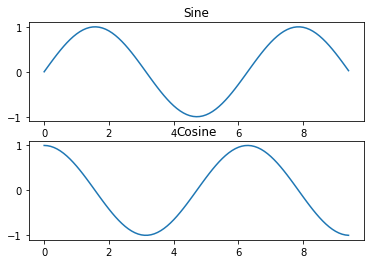

In [ ]:
# Computa las cordenadas x & y para puntos en las curvas seno y coseno
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# DEfine una cuadrícula subplot que tiene alto 2 y ancho 1,
# y activa el primer subplot.
plt.subplot(2, 1, 1)


# Hace el primer plot
plt.plot(x, y_sin)
plt.title('Sine')


# Activa el segundo subplot y realiza el segundo plot.
plt.subplot(2, 1, 2)
plt.plot(x, y_cos)
plt.title('Cosine')

# Muestra la figura.
plt.show()

Puede leer mucho más sobre la función `subplot` en la [documentación](http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplot).

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1f07750d-c0d2-4b29-a1e1-9ff9ed91fa38' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>